## Normalization and Standardization

Normalization/standardization are designed to achieve a similar goal, which is to create features that have similar ranges to each other and are widely used in data analysis to help the programmer to get some clue out of the raw data.

This notebook includes:

- Normalization
- Why normalize?
- Standardization
- Why standardization?
- Differences?
- When to use and when not
- Python code for Simple Feature Scaling, Min-Max, Z-score, log1p transformation

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style("whitegrid") #possible choices: white, dark, whitegrid, darkgrid, ticks

House Prices Dataset from https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
train = pd.read_csv('train.csv')
train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

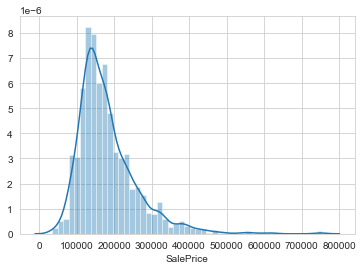

In [3]:
sns.distplot(train['SalePrice'])

## Normalization and Standardization
Normalization/standardization are designed to achieve a similar goal, which is to create features that have similar ranges to each other and are widely used in data analysis to help the programmer to get some clue out of the raw data.

### Normalization
It is the process of rescaling values between [0, 1].

### Why normalization?
1. Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients. Outliers are gone, but still remain visible within the normalized data. 
2. The use of a normalization method will improve analysis for some models.
3. Normalizing will ensure that a convergence problem does not have a massive variance, making optimization feasible.

### Standardization
It is the process of rescaling the features so that they’ll have the properties of a Gaussian distribution with μ=0 and σ=1.

### Why standardization?
1. Compare features that have different units or scales.
2. Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved.

### Differences?
1. Sometimes, when normalization does not work, standardization might do the work.
2. When using standardization, your new data aren’t bounded (unlike normalization).

### When to use and when not
Use for algorithms like:
- k-Nearest Neighbors
- k-Means
- Logistic Regression
- SVM
- Perceptrons
- PCA and LDA

Don't use for algorithms like:
- Decision Tree
- Random Forest
- XGBoost
- LightGBM

### Normalization Method 1 - Simple Feature Scaling
Data is rescaled and new values are in [0, 1].

In [4]:
train1 = train.copy()
train1['SalePrice'] = train1['SalePrice']/train1['SalePrice'].max()
train1['SalePrice'].head()

0    0.276159
1    0.240397
2    0.296026
3    0.185430
4    0.331126
Name: SalePrice, dtype: float64

### Normalization Method 2 - Min-Max

Data is rescaled and new values are in [0, 1].

<img src="https://cdn-images-1.medium.com/max/800/0*oRhJXkyKqqYp8--e." alt="z-score" style="width: 240px;"/>

In [5]:
train2 = train.copy()
train2['SalePrice'] = (train2['SalePrice']-train2['SalePrice'].min())/(train2['SalePrice'].max()-train2['SalePrice'].min())
train2['SalePrice'].head()

0    0.241078
1    0.203583
2    0.261908
3    0.145952
4    0.298709
Name: SalePrice, dtype: float64

### Standarization - Z-score 
It is the process of rescaling the features so that they’ll have the properties of a Gaussian distribution with μ=0 and σ=1

where μ is the mean and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

<img src="https://cdn-images-1.medium.com/max/800/1*w5nOX2X-62jGQ6_52nqmFA@2x.png" alt="z-score" style="width: 100px;"/>

In [15]:
train3 = train.copy()
train3['SalePrice'] = (train3['SalePrice']-train3['SalePrice'].mean())/train3['SalePrice'].std()
train3['SalePrice'].head()

0    0.347154
1    0.007286
2    0.535970
3   -0.515105
4    0.869545
Name: SalePrice, dtype: float64

### Transformation - log1p transformation.
Usually used to transform price values to log. Then, applying statistical learning becomes a lot easier.

Also, in case of positive skewness, log transformations usually works well.

In [7]:
train4 = train.copy()
train4['SalePrice'] = np.log1p(train3['SalePrice'])
train4['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

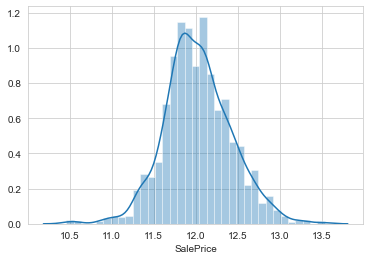

In [8]:
sns.distplot(train4['SalePrice'])

Sources:

<a href='https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc'>Medium - Standardize or Normalize? — Examples in Python</a>

<a href='https://www.quora.com/What-is-the-difference-between-normalization-standardization-and-regularization-for-data'>Quora - What is the difference between normalization, standardization, and regularization for data?</a>

<a href='http://www.dataminingblog.com/standardization-vs-normalization/'>dataminingblog - Standardization vs. Normalization</a>

<a href='http://sebastianraschka.com/Articles/2014_about_feature_scaling.html'>sebastianraschka - About Feature Scaling and Normalization</a>

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
train1['SalePrice'].describe() #Simple Feature Scaling

count    1460.000000
mean        0.239631
std         0.105222
min         0.046225
25%         0.172152
50%         0.215894
75%         0.283444
max         1.000000
Name: SalePrice, dtype: float64

In [13]:
train2['SalePrice'].describe() #Min-Max

count    1460.000000
mean        0.202779
std         0.110321
min         0.000000
25%         0.132030
50%         0.177892
75%         0.248715
max         1.000000
Name: SalePrice, dtype: float64

In [16]:
train3['SalePrice'].describe() #Z-score

count    1.460000e+03
mean     1.314017e-16
std      1.000000e+00
min     -1.838074e+00
25%     -6.412965e-01
50%     -2.255870e-01
75%      4.163867e-01
max      7.226343e+00
Name: SalePrice, dtype: float64